In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the cleaned data that was exported from Part 1
movies = pd.read_csv('Cleaned_Movies.csv')

#Deleting the first column as it is just a number column
del movies['Unnamed: 0']

#Viewing the data frame head
movies.head()

,genres,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Action,Color,Tim Burton,153,126,13000,390,Vincent Schiavelli,920,162831698,...,0,0,0,0,0,0,0,0,0,0
1,Action,Color,Jon Hess,19,87,29,147,Ian Gomez,683,1200000,...,0,0,0,0,0,0,0,0,0,0
2,Action,Color,Tony Jaa,110,110,0,7,Petchtai Wongkamlao,64,102055,...,0,0,0,0,0,0,0,0,0,0
3,Action,Color,RZA,208,107,561,353,RZA,746,15608545,...,0,0,0,0,0,0,0,0,0,0
4,Action,Color,Joel Schumacher,183,125,541,409,Vivica A. Fox,920,107285004,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Viewing the sums of all the numerical columns
numbers = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = movies.select_dtypes(include = numbers)
num_df.sum()

num_critic_for_reviews       6.041350e+05
duration                     4.074360e+05
director_facebook_likes      2.976109e+06
actor_3_facebook_likes       2.764116e+06
actor_1_facebook_likes       2.809783e+07
gross                        1.893007e+11
num_voted_users              3.830117e+08
cast_total_facebook_likes    4.169623e+07
facenumber_in_poster         5.133000e+03
num_user_for_reviews         1.211938e+06
budget                       1.556886e+11
title_year                   7.410832e+06
actor_2_facebook_likes       7.271781e+06
imdb_score.x                 2.391740e+04
aspect_ratio                 7.799530e+03
movie_facebook_likes         3.340769e+07
imdb_score.y                 2.376960e+04
Action                       9.270000e+02
Adventure                    7.550000e+02
Animation                    1.950000e+02
Biography                    2.400000e+02
Comedy                       1.454000e+03
Crime                        6.990000e+02
Documentary                  4.900

In [4]:
#It looks like there are no values under News and Short movies, so these columns will be removed.
del movies['News']
del movies['Short']

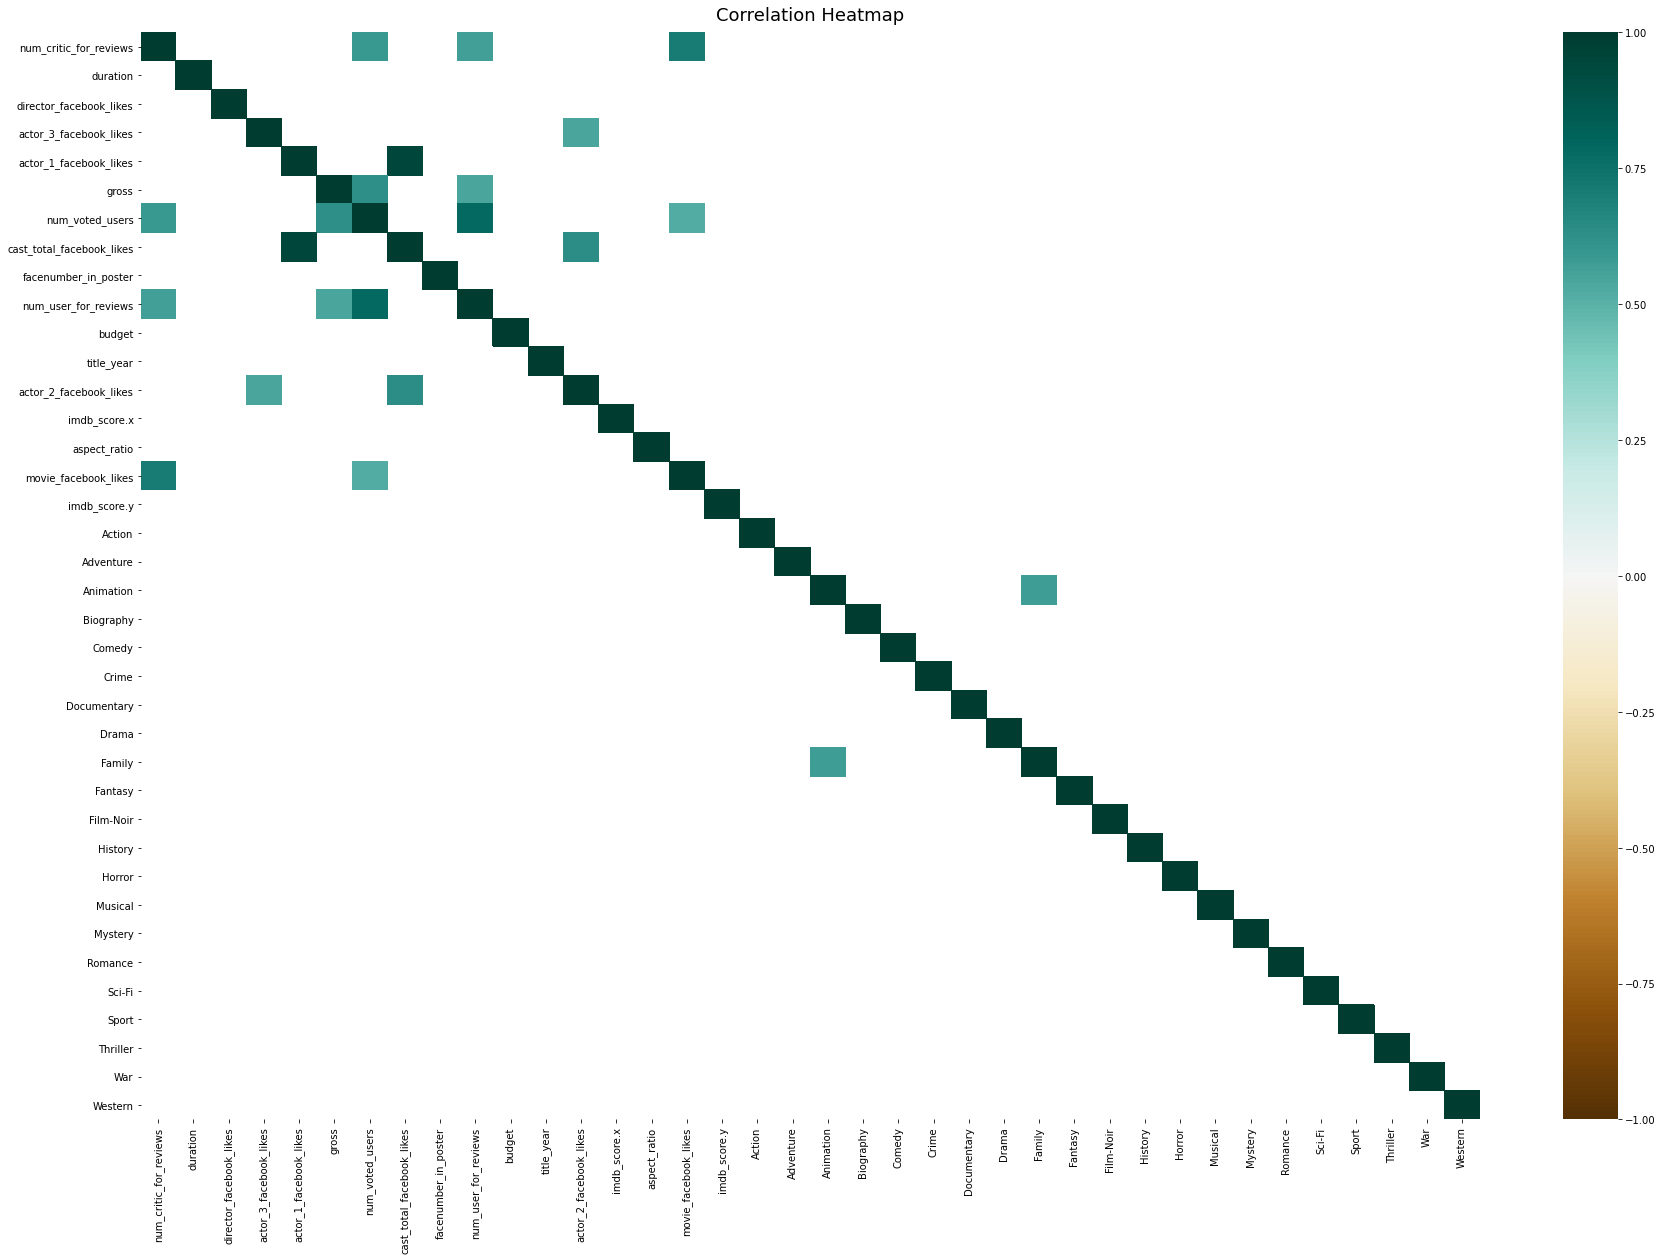

In [5]:
#Viewing the correlated variables once more to determine which variables are correlated
#Only correlations above 0.5 will be displayed to indicate what variables are causing multicollinearity.
#These variables will be removed before the EDA, feature selection, and model building steps.

plt.figure(figsize = (30, 20))
heatmap = sns.heatmap(movies.corr()[movies.corr() >= 0.5], vmin = -1, vmax = 1, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad = 12);

In [6]:
#Color, languages, and plot keywords will be removed as these features will be of no use to our analysis.
#Color and language are overwhelmingly of one element, and keywords are much too different to be useful
#for building a predictive analytic model.

del movies['color']
del movies['language']
del movies['plot_keywords']

In [7]:
#In addition, variables that were shown to have high correlations with other variables will be deleted, such as number 
#of users who voted on the movie in IMDb, number of user reviews, and number of critic reviews

del movies['num_voted_users']
del movies['num_user_for_reviews']
del movies['num_critic_for_reviews']

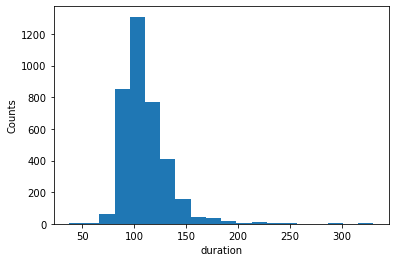

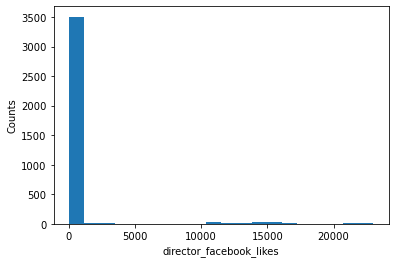

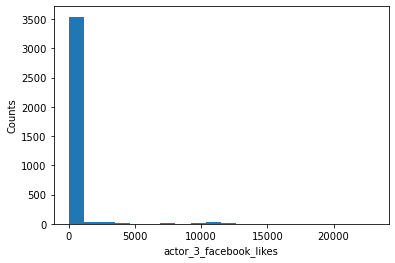

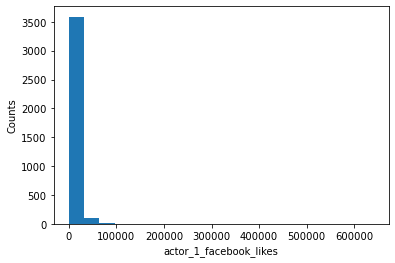

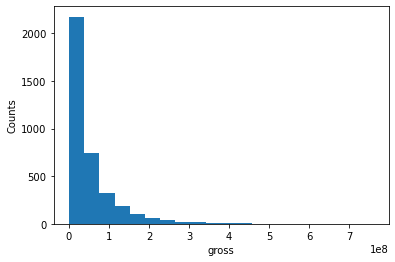

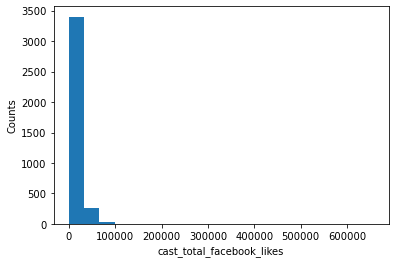

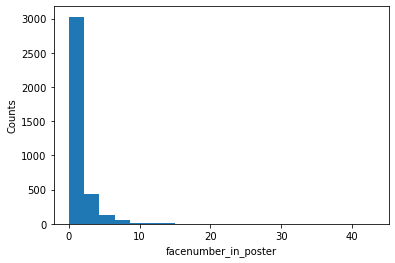

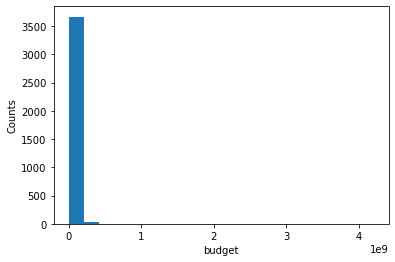

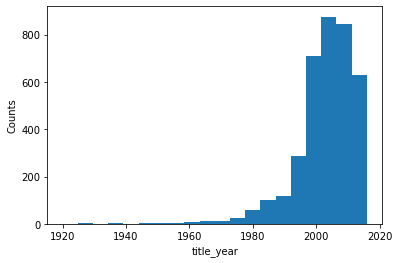

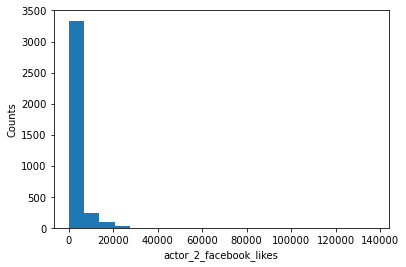

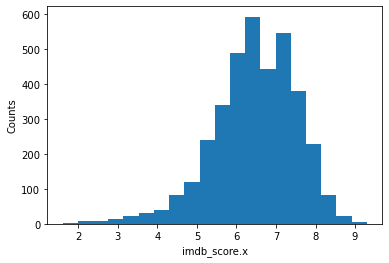

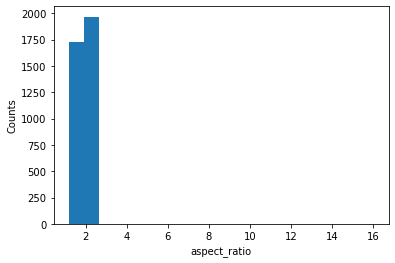

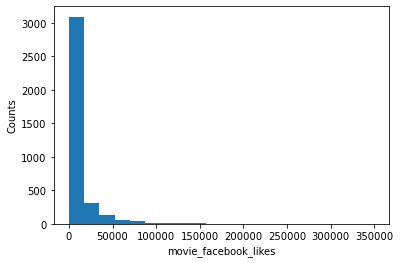

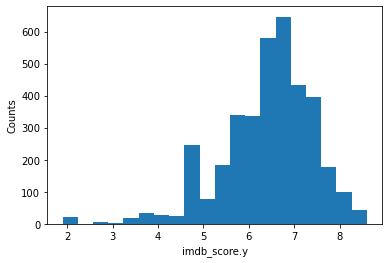

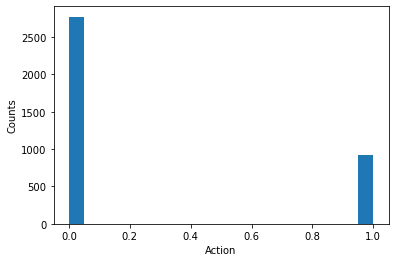

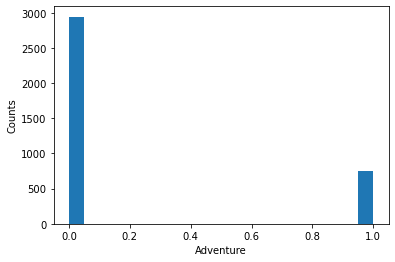

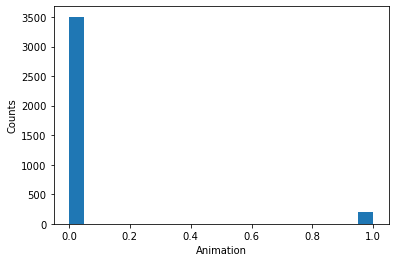

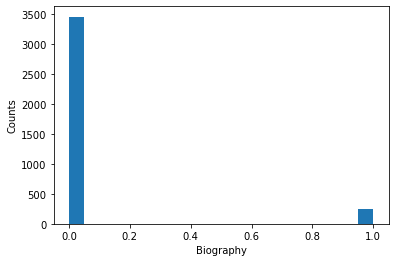

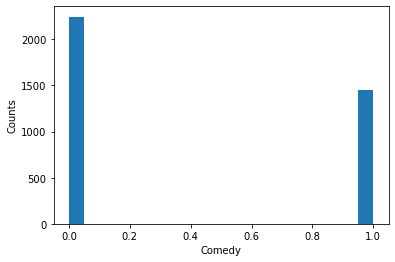

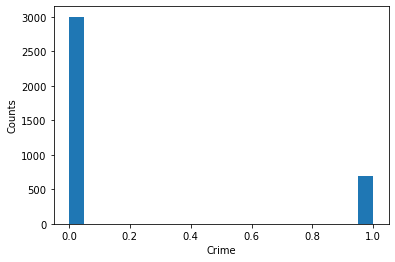

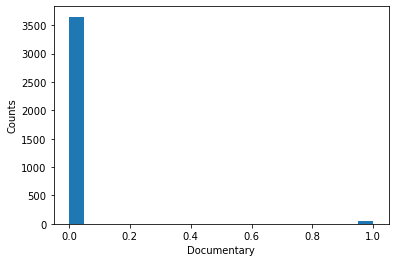

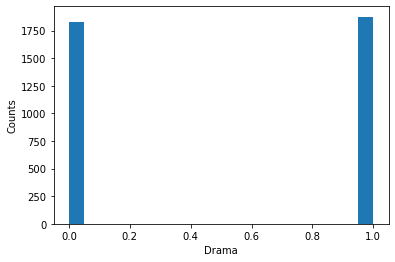

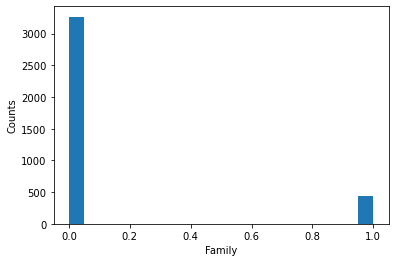

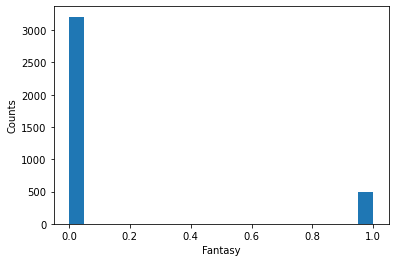

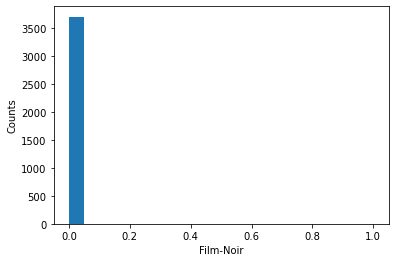

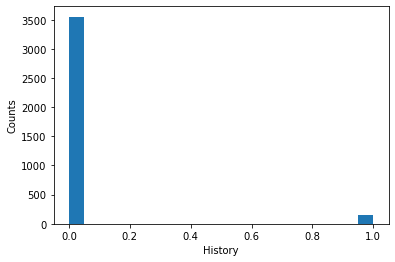

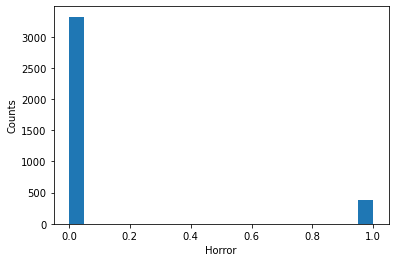

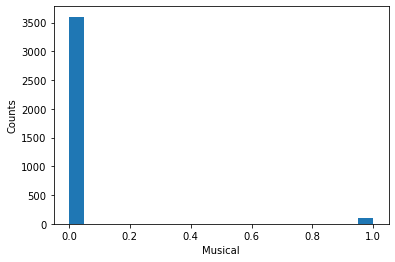

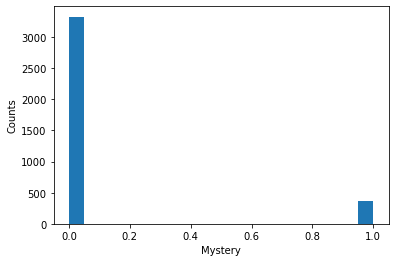

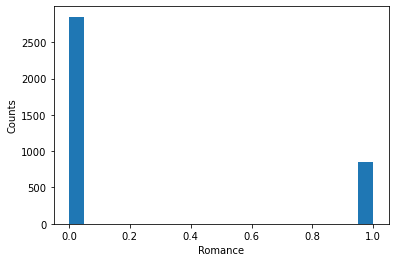

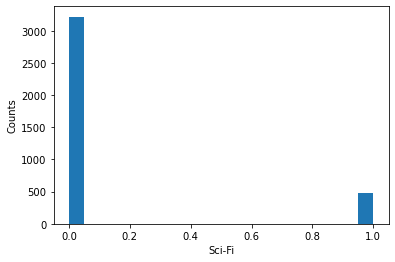

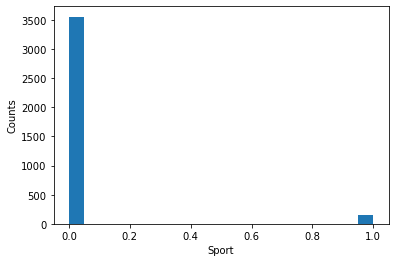

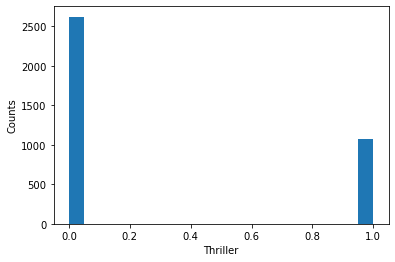

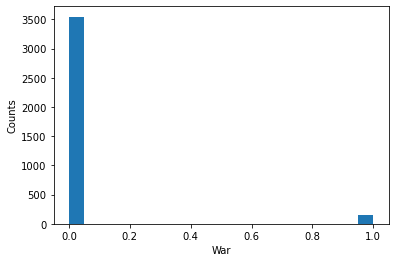

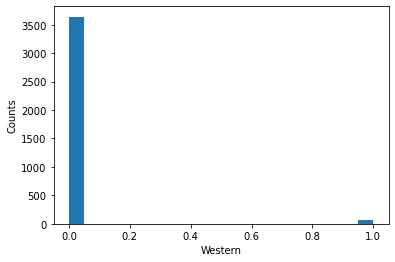

In [8]:
#Generating histograms of the numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = movies.select_dtypes(include = numerics)

for i in range(newdf.shape[1]):
    plt.hist(newdf[newdf.columns[i]], bins = 20)
    plt.xlabel(newdf.columns[i])
    plt.ylabel('Counts')
    plt.show()

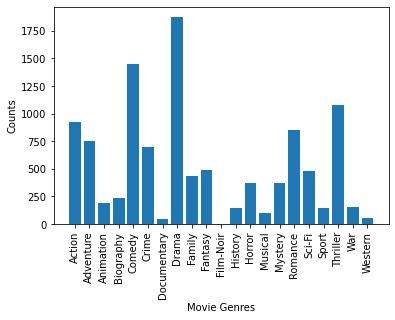

In [9]:
#Generating a bar chart of the movie genres
genre_names = movies.columns[23:]
sums = [movies[genre].sum() for genre in genre_names]

plt.bar(genre_names, sums)
plt.xlabel('Movie Genres')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

#It appears that Drama, Comedy, Thriller, Action, and Romance are the top 5 movie genres of all time

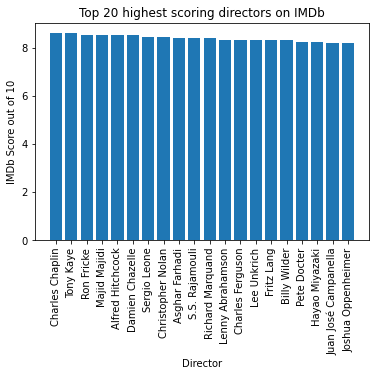

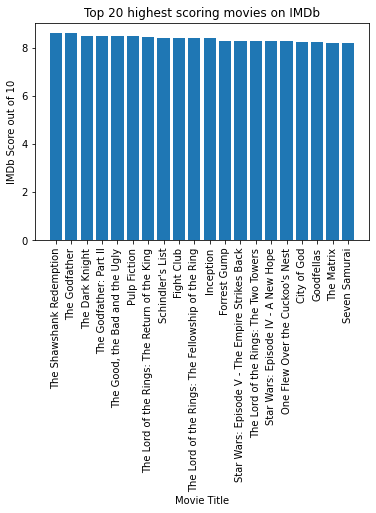

In [10]:
#Constructing a bar chart of the top 20 highest scoring film directors on IMDb and top 20 highest scoring movies on IMDb

IMDB_Score = movies.groupby('director_name').mean().sort_values(by = 'imdb_score.x', ascending = False)['imdb_score.x']

plt.bar(IMDB_Score.index[0:20], IMDB_Score[0:20])
plt.xlabel('Director')
plt.ylabel('IMDb Score out of 10')
plt.xticks(rotation = 90)
plt.title('Top 20 highest scoring directors on IMDb')
plt.show()

top20_movies = movies.sort_values(by = 'imdb_score.x', ascending = False)['movie_title'][0:20]

plt.bar(top20_movies, IMDB_Score[0:20])
plt.xlabel('Movie Title')
plt.ylabel('IMDb Score out of 10')
plt.xticks(rotation = 90)
plt.title('Top 20 highest scoring movies on IMDb')
plt.show()

#All 20 directors and films had scores between 8-8.5

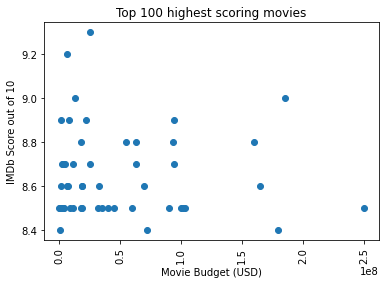

In [11]:
#Plotting IMDb score vs movie budget for the top 50 movies to see if there is a trend 
#between how much is spent on a movie and how well it does among viewers.

#Budgets for the top 50 scoring movies
top50_budgets = movies.sort_values(by = 'imdb_score.x', ascending = False)['budget'][0:50]

#Scores for the top 50 scoring movies
top50_scores = movies.sort_values(by = 'imdb_score.x', ascending = False)['imdb_score.x'][0:50]

plt.scatter(top50_budgets, top50_scores)
plt.xlabel('Movie Budget (USD)')
plt.ylabel('IMDb Score out of 10')
plt.title('Top 100 highest scoring movies')
plt.xticks(rotation = 90)
plt.show()

#It doesn't look like there is a trend between budget and how well a movie performs

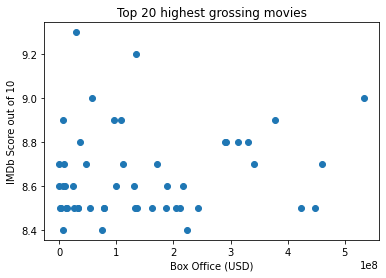

In [12]:
#What about IMDb score vs how much a movie grosses for the top 20 movies?

#Box office for the top 50 movies
top50_gross = movies.sort_values(by = 'imdb_score.x', ascending = False)['gross'][0:50]

#Scores for the top 50 movies
top50_scores = movies.sort_values(by = 'imdb_score.x', ascending = False)['imdb_score.x'][0:50]

plt.scatter(top50_gross, top50_scores)
plt.xlabel('Box Office (USD)')
plt.ylabel('IMDb Score out of 10')
plt.title('Top 20 highest grossing movies')
plt.show()

#Again, there appears to be no trend between how much a film grossed and its IMDb score for the top 50 films

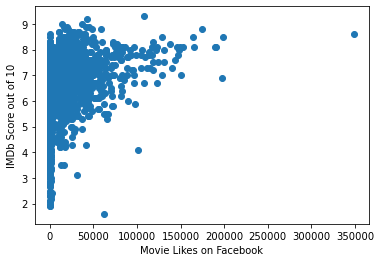

In [13]:
likes = movies['movie_facebook_likes']
scores = movies['imdb_score.x']

plt.scatter(likes, scores)
plt.xlabel('Movie Likes on Facebook')
plt.ylabel('IMDb Score out of 10')
plt.show()